In [35]:
from cospar import reader, F, paramkeys, datakeys

import math
import numpy as np
from everest.analysis import Simulator
from everest import window
from everest.window.data import Data
from matplotlib.pyplot import get_cmap
%matplotlib inline

In [2]:
cut = reader[(F('f') == 1) & (F('aspect') == 1)]
tauRefs = sorted(set(reader[cut : 'tauRef'].values()))

In [3]:
simulators = {}
keys = tuple(k for k in datakeys if not k in {'t', 'dt'})
for tauRef in tauRefs:
    tauCut = cut & reader[F('tauRef') == tauRef]
    datas, ts = reader[tauCut : keys], reader[tauCut : 't']
    simulators[tauRef] = Simulator(datas, ts)

In [28]:
simDatas = dict()
for tauRef, simulator in simulators.items():
    outs = simDatas.setdefault(tauRef, [])
    for _ in range(1):
        out = simulator.randsimulate(int(1e5), dt = 1e-6)
        outs.append(out)

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [29]:
canvas = window.Canvas(size = (18, 9))
ax = canvas.make_ax()
logTaus = [math.log10(tau) for tau in sorted(simDatas.keys())]
normTau = lambda tau: (math.log10(tau) - min(logTaus)) / (max(logTaus) - min(logTaus))
cmap = get_cmap('viridis')
for tauRef, simData in simDatas.items():
    for ts, vals in simData:
        ax.line(ts, vals[:, 0], c = cmap(normTau(tauRef)))

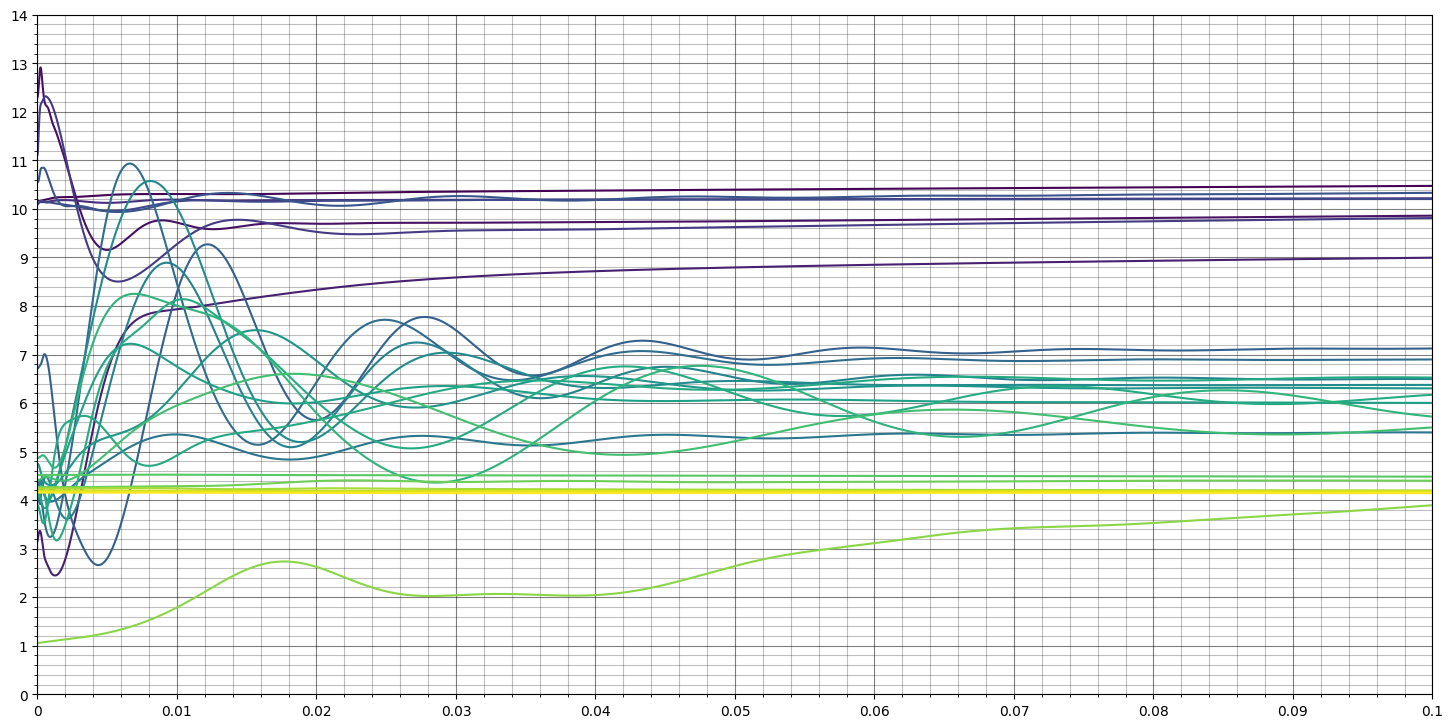

In [30]:
canvas.show()

In [31]:
for tauRef, simulator in simulators.items():
    outs = simDatas.setdefault(tauRef, [])
    for _ in range(9):
        out = simulator.randsimulate(int(1e5), dt = 1e-6)
        outs.append(out)

In [49]:
canvas = window.Canvas(size = (18, 9), facecolour = 'black')
ax = canvas.make_ax()
logTaus = [math.log10(tau) for tau in simDatas.keys()]
normTau = lambda tau: (math.log10(tau) - min(logTaus)) / (max(logTaus) - min(logTaus))
cmap = get_cmap('viridis')
for tauRef, simData in simDatas.items():
    for ts, vals in simData:
        ax.line(
            Data(ts, label = 'Predicted time', lims = (None, 0.03)),
            Data(vals[:, 0], label = 'Predicted Nu', lims = (0, 20)),
            c = cmap(normTau(tauRef))
            )

ax.axes.colour = 'white'
ax.ticks.colour = 'white'
ax.grid.colour = 'grey'
ax.axes.title = 'Predicted Nusselt number over time\n{aspect = 1, curvature = 1}'

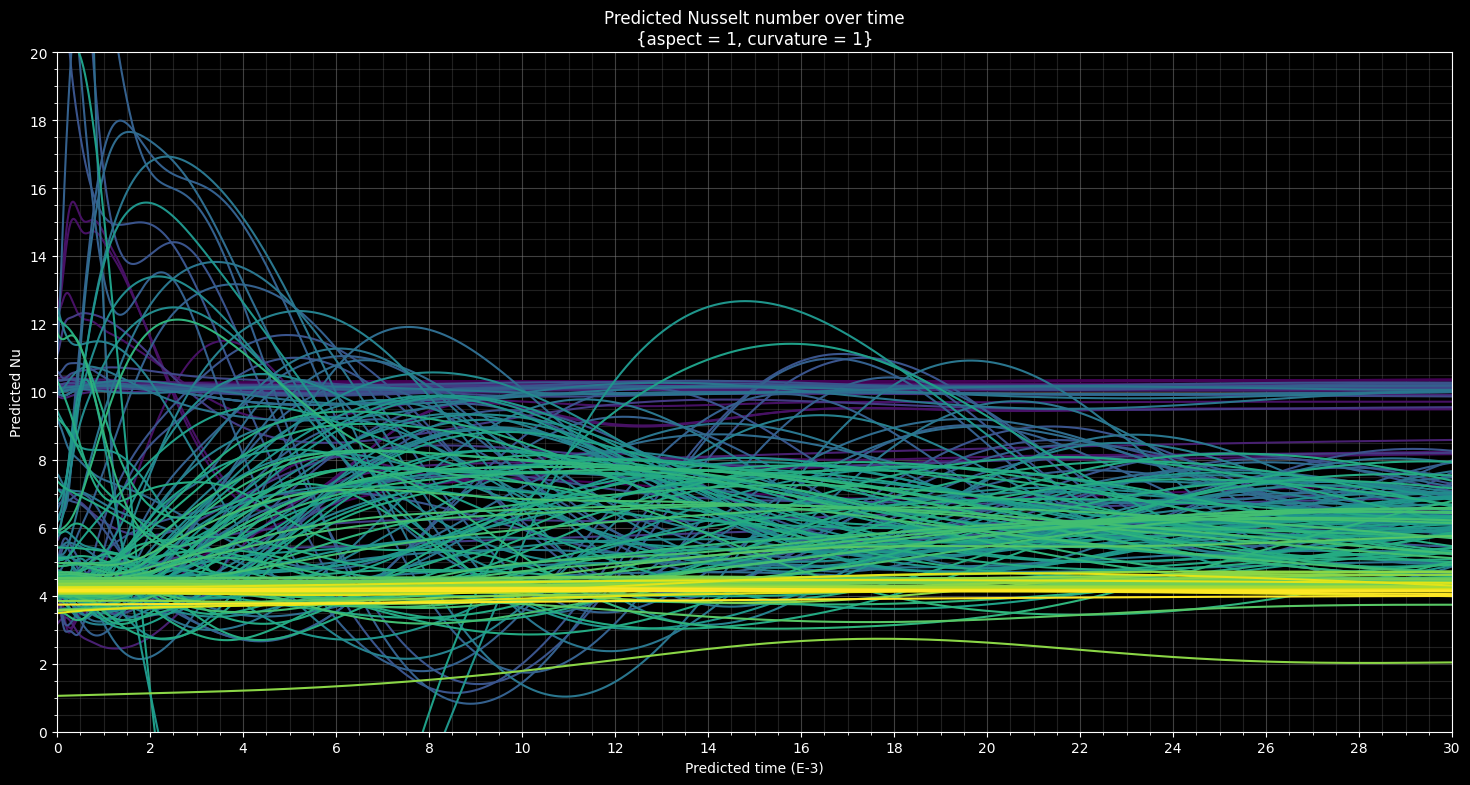

In [50]:
canvas.show()

In [71]:
simDatas2 = dict()
initial = simulators[10 ** 5.2].X[0] #sinusoidal
for tauRef, simulator in simulators.items():
    out = simulator.simulate(initial, int(1e5), dt = 1e-6)
    simDatas2[tauRef] = out

In [74]:
canvas = window.Canvas(size = (18, 9), facecolour = 'black')
ax = canvas.make_ax()
logTaus = [math.log10(tau) for tau in [k for k in simDatas2.keys() if not k == 4e5]]
normTau = lambda tau: (math.log10(tau) - min(logTaus)) / (max(logTaus) - min(logTaus))
cmap = get_cmap('viridis')
for tauRef, (ts, vals) in simDatas2.items():
    if tauRef == 4e5: continue
    ax.line(
        Data(ts, label = 'Predicted time'),
        Data(vals[:, 0], label = 'Predicted Nu'),
        c = cmap(normTau(tauRef))
        )

ax.axes.colour = 'white'
ax.ticks.colour = 'white'
ax.grid.colour = 'grey'
ax.axes.title = 'Predicted Nusselt number over time: sinusoidal IC\n{aspect = 1, curvature = 1}'

legendValues = logTaus
legendHandles = [r[0] for r in ax.collections]
legendLabels = [str(round(v, 2)) for v in legendValues]
handles, labels, _ = zip(*sorted(zip(legendHandles, legendLabels, legendValues), key = lambda r: r[-1]))
legend = ax.ax.legend(
    handles,
    labels,
    loc = 'right',
    framealpha = 0.,
    labelcolor = 'white',
    title = 'tau0 (10^n)',
    bbox_to_anchor = (1.08, 0.5),
    )
legend.properties()['title'].set_color('white')

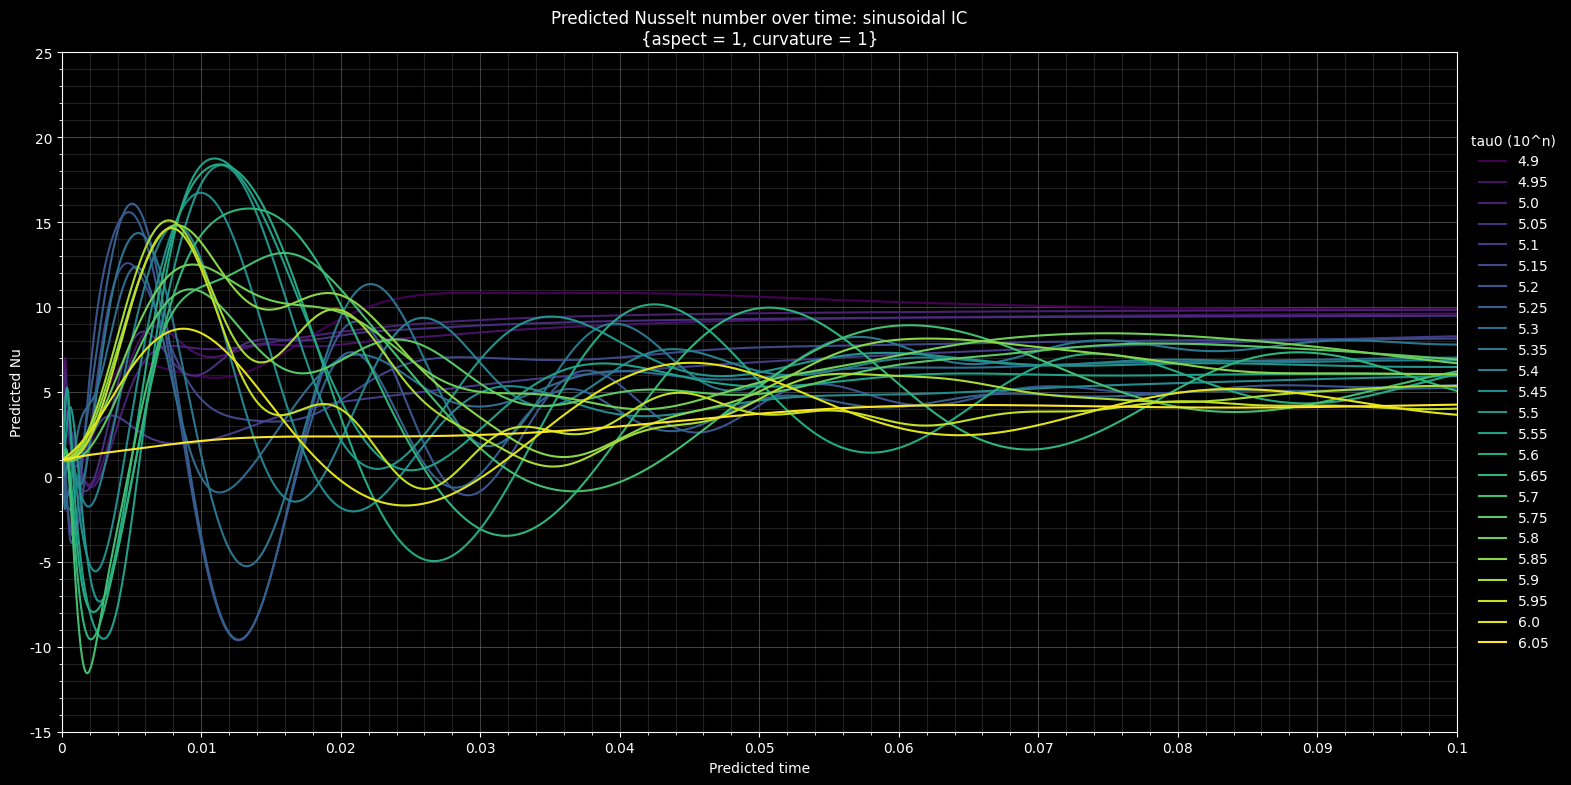

In [75]:
canvas.show()